<a href="https://colab.research.google.com/github/tphlabs/python_workshop/blob/main/DC2practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 2 Graph workshop. DC2 Voltage divider

2024 Evgeny Kolonsky

Here are student's code and result plotted

Theory Summary
Resistances are: R1= 0.7064 kilo-ohm, R2= 2.6818 kilo-ohm
Theoretical voltage divider ratio: 0.7915117171359424
Expected Ratio: 0.8


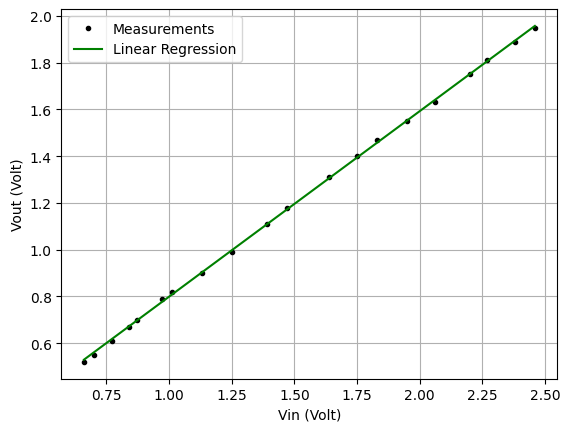

Plot Summary
Measured ratio from linear regression: 0.7932
Error from expected ratio: 0.8 %


In [9]:
"""
Created on Sun Jan 28 15:40:17 2024

@author: i.r
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

#On theory:
#We want R2 / (R1 + R2) = 4/5
#Which means R2 / R1 = 4
#Resistors measured from: R1 = 690 ohm (220 + 470 in series), R2 = 2.7 kilo-ohm

#Measurements:
R1 = 0.7064 #kilo-ohm +- 0.0002
R2 = 2.6818 #kilo-ohm +- 0.0003
theo_ratio = R2 / (R1 + R2)

print("Theory Summary")
print("Resistances are: R1=", R1, "kilo-ohm, R2=", R2, "kilo-ohm")
print("Theoretical voltage divider ratio:", theo_ratio)
print("Expected Ratio:", 4 / 5)
#%%

#Measurements:

Vin = np.array([2.46, 2.38, 2.27, 2.20, 2.06, 1.95, 1.83, 1.75, 1.64, 1.47, 1.39, 1.25, 1.13, 1.01, 0.97, 0.87, 0.84, 0.77, 0.7, 0.66]) #volt +- 0.01
Vout = np.array([1.95, 1.89, 1.81, 1.75, 1.63, 1.55, 1.47, 1.40, 1.31, 1.18, 1.11, 0.99, 0.90, 0.82, 0.79, 0.70, 0.67, 0.61, 0.55, 0.52]) #volt +- 0.01

#Linear Regression:
slope, intercept, rvalue, stderr, intercept_stderr = linregress(Vin, Vout)


#%%
#Plotting
xs =  np.linspace(min(Vin), max(Vin), 1000)
fig = plt.figure()
plt.plot(Vin, Vout, "k.", label = "Measurements")
plt.plot(xs, slope*xs + intercept, "g-", label="Linear Regression")
plt.legend()
plt.grid()
plt.xlabel("Vin (Volt)")
plt.ylabel("Vout (Volt)")
plt.show()

print("Plot Summary")
print("Measured ratio from linear regression:", np.round(slope, 4))
print("Error from expected ratio:", np.round(abs(slope - 0.8)/0.8 * 100, 1), "%")

Here is improved graph

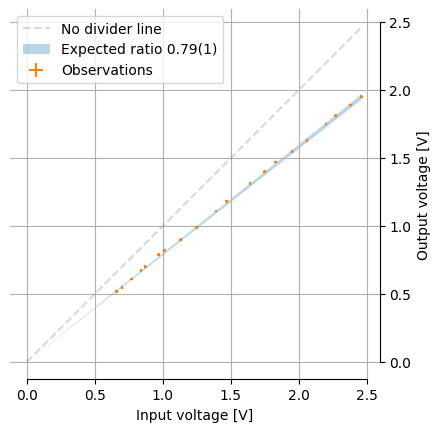

In [50]:
# measurements
Vin = np.array([2.46, 2.38, 2.27, 2.20, 2.06, 1.95, 1.83, 1.75, 1.64, 1.47, 1.39, 1.25, 1.13, 1.01, 0.97, 0.87, 0.84, 0.77, 0.7, 0.66]) #volt +- 0.01
Vout = np.array([1.95, 1.89, 1.81, 1.75, 1.63, 1.55, 1.47, 1.40, 1.31, 1.18, 1.11, 0.99, 0.90, 0.82, 0.79, 0.70, 0.67, 0.61, 0.55, 0.52]) #volt +- 0.01
V_err = 0.01 #V

# Observed:
slope, intercept, rvalue, stderr, intercept_stderr = linregress(Vin, Vout)

# expected
R1 = 0.7064 #kilo-ohm +- 0.004
R2 = 2.6818 #kilo-ohm +- 0.01
theo_ratio = R2 / (R1 + R2)
theo_ratio_rel = 0.01 # 2% relative error propagated from R1, R2 errors # Accuracy 2k to 2MΩ rgs: ±(0.5% rdg +1dgt)
theo_ratio_err = theo_ratio * theo_ratio_rel
theo_ratio_low = theo_ratio - theo_ratio_err
theo_ratio_high = theo_ratio + theo_ratio_err

xs =  np.linspace(0, max(Vin))
plt.errorbar(Vin, Vout, yerr=V_err, xerr=V_err, ls='')
y1 = theo_ratio_low * xs
y2 = theo_ratio_high * xs
plt.plot(xs, xs, label='No divider line', linestyle='dashed', color='gray', alpha=0.3) # no divider line
plt.fill_between(xs, y1, y2, label=f'Expected ratio {theo_ratio:.2f}(1)', alpha=0.3)
plt.errorbar(Vin, Vout, yerr=V_err, xerr=V_err, ls='', label=f'Observations')
plt.legend()
plt.grid()
plt.axis('square')
plt.xlabel("Input voltage [V]")
plt.ylabel("Output voltage [V]")

# Spines
# Only draw spines for the data range, not in the margins
ax = plt.gca()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("right")
ax.spines.bottom.set_bounds(0, 2.5)
ax.spines.right.set_bounds(0, 2.5)
# Hide the right and top spines
ax.spines.left.set_visible(False)
ax.spines.top.set_visible(False)
plt.savefig('DC2practice.jpg')
plt.show()

